In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [3]:
bs = 64

In [4]:
URLs.CARS

'https://s3.amazonaws.com/fast-ai-imageclas/stanford-cars'

In [5]:
path = untar_data(URLs.CARS) 
path

PosixPath('/home/jupyter/.fastai/data/stanford-cars')

In [6]:
all_images_path = download_data('http://imagenet.stanford.edu/internal/car196/car_ims.tgz', ext='')

In [7]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/stanford-cars/cars_train'),
 PosixPath('/home/jupyter/.fastai/data/stanford-cars/cars_annos.mat'),
 PosixPath('/home/jupyter/.fastai/data/stanford-cars/cars_test'),
 PosixPath('/home/jupyter/.fastai/data/stanford-cars/car_ims')]

In [8]:
import scipy.io as sio

In [9]:
annotations = sio.loadmat(open(path/'cars_annos.mat', 'rb'))

In [10]:
class_names = [cn[0] for cn in annotations['class_names'][0]]

In [11]:
class_names[:5]

['AM General Hummer SUV 2000',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012']

In [12]:
file_data = [(class_names[int(x[5]) - 1], int(x[6])) for x in annotations['annotations'][0]]

In [13]:
import pandas as pd

file_data_df = pd.DataFrame(file_data, columns=['label', 'istest'])

In [14]:
fnames = get_image_files(path/'car_ims')
fnames.sort()

In [15]:
fnames[0:10]

[PosixPath('/home/jupyter/.fastai/data/stanford-cars/car_ims/000001.jpg'),
 PosixPath('/home/jupyter/.fastai/data/stanford-cars/car_ims/000002.jpg'),
 PosixPath('/home/jupyter/.fastai/data/stanford-cars/car_ims/000003.jpg'),
 PosixPath('/home/jupyter/.fastai/data/stanford-cars/car_ims/000004.jpg'),
 PosixPath('/home/jupyter/.fastai/data/stanford-cars/car_ims/000005.jpg'),
 PosixPath('/home/jupyter/.fastai/data/stanford-cars/car_ims/000006.jpg'),
 PosixPath('/home/jupyter/.fastai/data/stanford-cars/car_ims/000007.jpg'),
 PosixPath('/home/jupyter/.fastai/data/stanford-cars/car_ims/000008.jpg'),
 PosixPath('/home/jupyter/.fastai/data/stanford-cars/car_ims/000009.jpg'),
 PosixPath('/home/jupyter/.fastai/data/stanford-cars/car_ims/000010.jpg')]

In [16]:
file_data_df['name'] = fnames

In [17]:
file_data_df['istest'].value_counts()

0    8144
1    8041
Name: istest, dtype: int64

In [18]:
file_data_df['name'] = file_data_df['name'].apply(lambda x: x.name)

In [19]:
train_df = file_data_df[file_data_df['istest'] == 0][['name', 'label']]
test_df = file_data_df[file_data_df['istest'] == 1][['name', 'label']]

In [20]:
train_df.head()

name                       label
0  000001.jpg  AM General Hummer SUV 2000
1  000002.jpg  AM General Hummer SUV 2000
2  000003.jpg  AM General Hummer SUV 2000
3  000004.jpg  AM General Hummer SUV 2000
4  000005.jpg  AM General Hummer SUV 2000

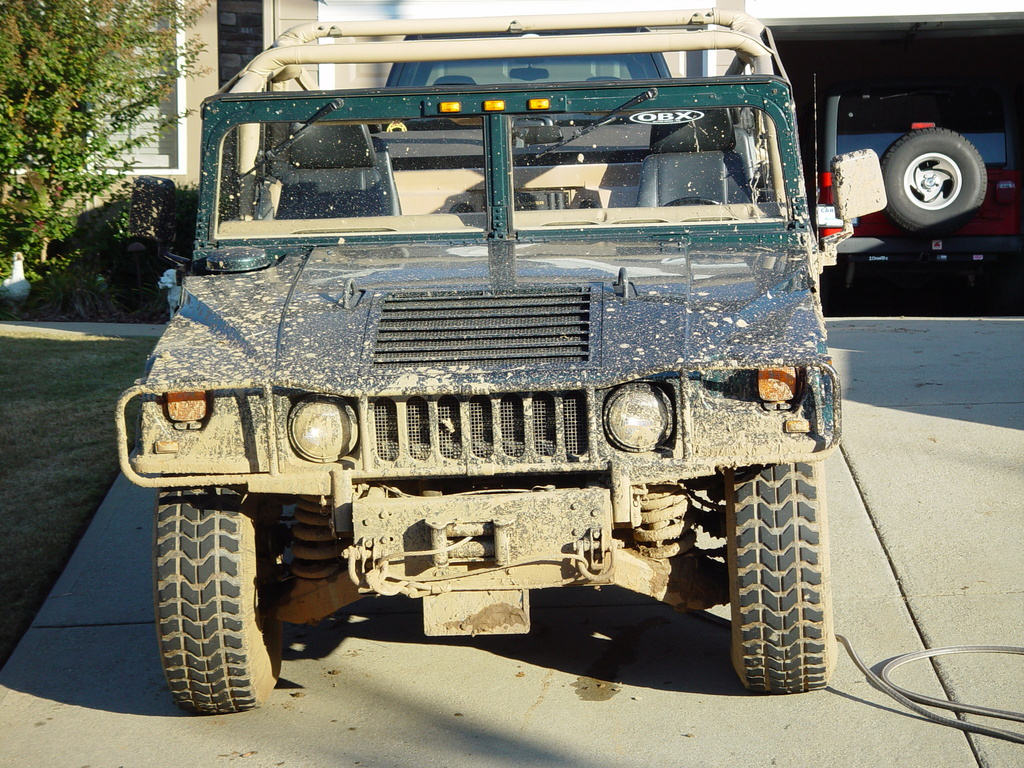

In [21]:
open_image(fnames[0])

In [21]:
file_data_df.head()

label  istest        name
0  AM General Hummer SUV 2000       0  000001.jpg
1  AM General Hummer SUV 2000       0  000002.jpg
2  AM General Hummer SUV 2000       0  000003.jpg
3  AM General Hummer SUV 2000       0  000004.jpg
4  AM General Hummer SUV 2000       0  000005.jpg

In [22]:
test_df.head()

name                       label
45  000046.jpg  AM General Hummer SUV 2000
46  000047.jpg  AM General Hummer SUV 2000
47  000048.jpg  AM General Hummer SUV 2000
48  000049.jpg  AM General Hummer SUV 2000
49  000050.jpg  AM General Hummer SUV 2000

In [23]:
data = ImageDataBunch.from_df(path/'car_ims', train_df, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

In [24]:
test_data = ImageList.from_df(test_df, path/'car_ims')

In [25]:
data.add_test(test_data)

In [26]:
data

ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
AM General Hummer SUV 2000,AM General Hummer SUV 2000,AM General Hummer SUV 2000,AM General Hummer SUV 2000,AM General Hummer SUV 2000
Path: /home/jupyter/.fastai/data/stanford-cars/car_ims;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Hyundai Elantra Sedan 2007,Lincoln Town Car Sedan 2011,Isuzu Ascender SUV 2008,GMC Terrain SUV 2012,Chevrolet Express Cargo Van 2007
Path: /home/jupyter/.fastai/data/stanford-cars/car_ims;

Test: LabelList (8041 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /home/jupyter/.fastai/data/stanford-cars/car_ims

In [27]:
class_names[:5]

['AM General Hummer SUV 2000',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012']

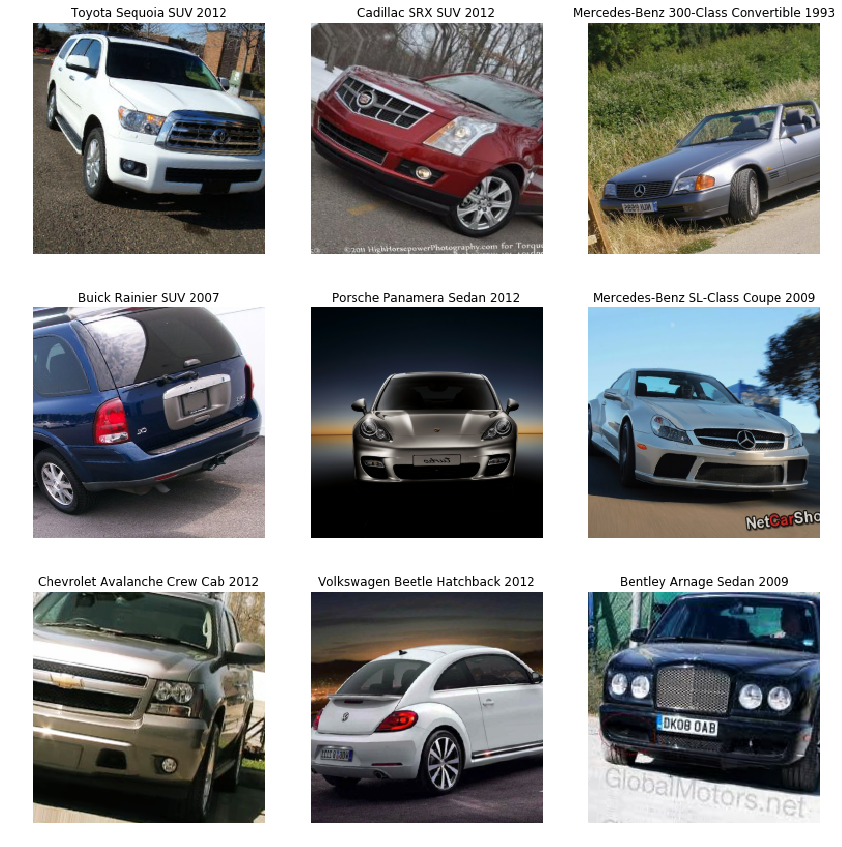

In [80]:
data.show_batch(rows=3)

In [28]:
data

ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
AM General Hummer SUV 2000,AM General Hummer SUV 2000,AM General Hummer SUV 2000,AM General Hummer SUV 2000,AM General Hummer SUV 2000
Path: /home/jupyter/.fastai/data/stanford-cars/car_ims;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Chrysler 300 SRT-8 2010,Chrysler PT Cruiser Convertible 2008,Porsche Panamera Sedan 2012,GMC Yukon Hybrid SUV 2012,Dodge Magnum Wagon 2008
Path: /home/jupyter/.fastai/data/stanford-cars/car_ims;

Test: LabelList (8041 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /home/jupyter/.fastai/data/stanford-cars/car_ims

## Prediction

In [27]:
np.random.seed(0)
learn = cnn_learner(data, models.resnet152, metrics=[error_rate, accuracy])

In [28]:
doc(learn.lr_find)

lr_find [source] [test] lr_find ( learn : Learner , start_lr : Floats = 1e-07 , end_lr : Floats = 10 , num_it : int = 100 , stop_div : bool = True , wd : float = None ) 
 
 × Tests found for lr_find : pytest -sv tests/test_train.py::test_lr_find [source] pytest -sv tests/test_vision_train.py::test_lrfind [source] To run tests please refer to this guide . Explore lr from start_lr to end_lr over num_it iterations in learn . If stop_div , stops when loss diverges. 
 Show in docs

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


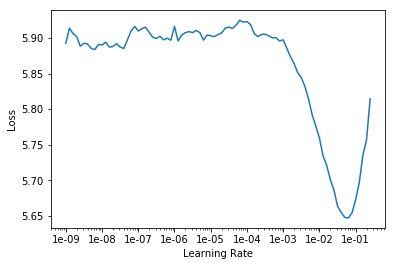

In [31]:
learn.lr_find(start_lr=1e-10, end_lr=1)
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


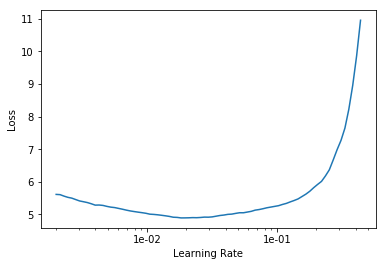

In [36]:
learn.lr_find(start_lr=1e-03, end_lr=1)
learn.recorder.plot()

In [32]:
doc(learn.fit_one_cycle)

fit_one_cycle [source] [test] fit_one_cycle ( learn : Learner , cyc_len : int , max_lr : Union [ float , Collection [ float ], slice ]= slice(None, 0.003, None) , moms : Point = (0.95, 0.85) , div_factor : float = 25.0 , pct_start : float = 0.3 , final_div : float = None , wd : float = None , callbacks : Optional [ Collection [ Callback ]]= None , tot_epochs : int = None , start_epoch : int = None ) 
 
 × Tests found for fit_one_cycle : pytest -sv tests/test_train.py::test_fit_one_cycle [source] To run tests please refer to this guide . Fit a model following the 1cycle policy. 
 Show in docs

In [29]:
learn.fit_one_cycle(20, max_lr=slice(1e-03, 2e-02))

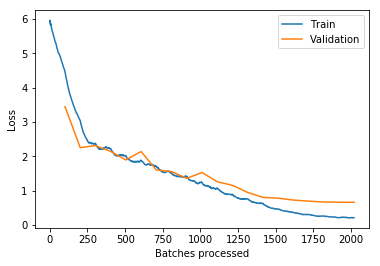

In [31]:
learn.recorder.plot_losses()
# validation data has reached a plateau

In [44]:
learn.fit_one_cycle(10, max_lr=slice(1e-02, 1e-1))
# this led to overfitting, so the LR was too high

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/opt/anaconda

KeyboardInterrupt: 

  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


In [32]:
# increasing the lr a bit and icreasing the momentum a bit.
learn.fit_one_cycle(10, max_lr=slice(1e-03, 5e-02), moms=(1, 0.9))
# i think the momentum shouldn;t be this high

/opt/anaconda3/lib/python3.7/site-packages/torch/optim/adam.py:105: RuntimeWarning: divide by zero encountered in double_scalars
  step_size = group['lr'] * math.sqrt(bias_correction2) / bias_correction1
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 368, in 

KeyboardInterrupt: 

In [30]:
learn.fit_one_cycle(10, max_lr=slice(1e-03, 2e-02), moms=(0.99, 0.9))
# actually for now don't tinker with momenrtum, because you don't understand it yet

In [32]:
learn.save('cars-stage-1-resnet152')

In [52]:
learn = learn.load('cars-stage-1-resnet152')

In [53]:
data.valid_ds

LabelList (1628 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Dodge Challenger SRT8 2011,Spyker C8 Convertible 2009,Audi 100 Sedan 1994,Hyundai Sonata Sedan 2012,Mercedes-Benz E-Class Sedan 2012
Path: /home/jupyter/.fastai/data/stanford-cars/car_ims

In [33]:
preds = learn.get_preds(DatasetType.Test)

In [34]:
label_index = np.argmax(preds[0], 1)

In [35]:
test_predictions = [data.classes[int(x)] for x in label_index]

In [36]:
test_df['predictions'] = test_predictions
#test_df['predictions'] = test_predictions

In [37]:
test_df.head()

name                       label                 predictions
45  000046.jpg  AM General Hummer SUV 2000  AM General Hummer SUV 2000
46  000047.jpg  AM General Hummer SUV 2000  AM General Hummer SUV 2000
47  000048.jpg  AM General Hummer SUV 2000  AM General Hummer SUV 2000
48  000049.jpg  AM General Hummer SUV 2000  AM General Hummer SUV 2000
49  000050.jpg  AM General Hummer SUV 2000  AM General Hummer SUV 2000

In [38]:
test_df['predictions'] = test_df['predictions'].apply(str)

In [39]:
(test_df['label'] == test_df['predictions']).sum()/test_df.shape[0]

0.8324835219500062

## Results


In [40]:
interp = ClassificationInterpretation.from_learner(learn)

In [41]:
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

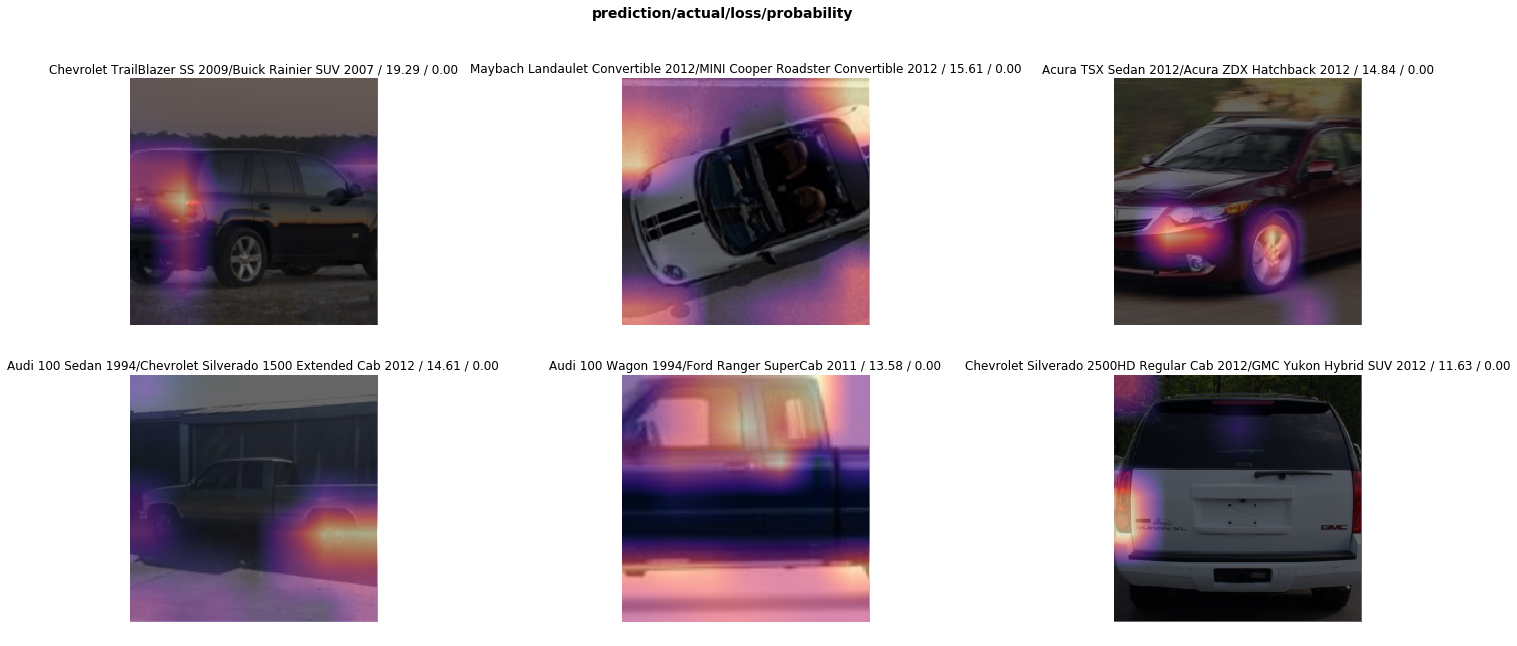

In [42]:
interp.plot_top_losses(6, figsize=(25, 10), heatmap=True)

In [43]:
interp.most_confused(min_val=3)

[('Dodge Caliber Wagon 2007', 'Dodge Caliber Wagon 2012', 9),
 ('Chevrolet Silverado 1500 Hybrid Crew Cab 2012',
  'Chevrolet Silverado 1500 Extended Cab 2012',
  7),
 ('Aston Martin Virage Convertible 2012',
  'Aston Martin V8 Vantage Convertible 2012',
  5),
 ('Aston Martin V8 Vantage Convertible 2012',
  'Aston Martin V8 Vantage Coupe 2012',
  3),
 ('Audi TT Hatchback 2011', 'Audi TTS Coupe 2012', 3),
 ('Bentley Continental Flying Spur Sedan 2007',
  'Bentley Continental GT Coupe 2007',
  3),
 ('Ferrari California Convertible 2012',
  'Ferrari 458 Italia Convertible 2012',
  3),
 ('Suzuki SX4 Sedan 2012', 'Suzuki SX4 Hatchback 2012', 3)]

## Removing bad images

In [119]:
from fastai.widgets import *

In [139]:
db = (ImageList.from_df(path=path/'car_ims', df=train_df)
        .split_none()
        .label_from_df()
        .transform(get_transforms(), size=224)
        .databunch())

In [140]:
db

ImageDataBunch;

Train: LabelList (8144 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
AM General Hummer SUV 2000,AM General Hummer SUV 2000,AM General Hummer SUV 2000,AM General Hummer SUV 2000,AM General Hummer SUV 2000
Path: /home/jupyter/.fastai/data/stanford-cars/car_ims;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /home/jupyter/.fastai/data/stanford-cars/car_ims;

Test: None

In [141]:
learn_cln = cnn_learner(db, models.resnet152, metrics=[error_rate, accuracy])

In [142]:
learn_cln.load('cars-stage-1-resnet152')

Learner(data=ImageDataBunch;

Train: LabelList (8144 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
AM General Hummer SUV 2000,AM General Hummer SUV 2000,AM General Hummer SUV 2000,AM General Hummer SUV 2000,AM General Hummer SUV 2000
Path: /home/jupyter/.fastai/data/stanford-cars/car_ims;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /home/jupyter/.fastai/data/stanford-cars/car_ims;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum

In [148]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [149]:
ImageCleaner?

In [150]:
ImageCleaner(ds, idxs, path/'car_ims',3)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [151]:
import pandas as pd

In [156]:
pd.read_csv(str(path) + '/car_ims/cleaned.csv').shape

(8142, 2)

## Unfreeze, train the full model

In [44]:
learn.unfreeze()

In [47]:
doc(learn.lr_find)

lr_find [source] [test] lr_find ( learn : Learner , start_lr : Floats = 1e-07 , end_lr : Floats = 10 , num_it : int = 100 , stop_div : bool = True , wd : float = None ) 
 
 × Tests found for lr_find : pytest -sv tests/test_train.py::test_lr_find [source] pytest -sv tests/test_vision_train.py::test_lrfind [source] To run tests please refer to this guide . Explore lr from start_lr to end_lr over num_it iterations in learn . If stop_div , stops when loss diverges. 
 Show in docs

In [50]:
learn.lr_find(start_lr=1e-15, end_lr=1e-03)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


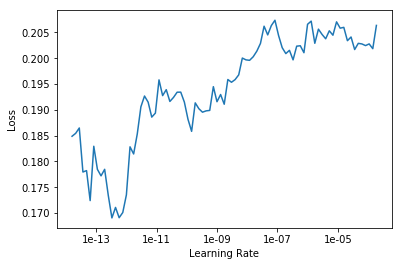

In [51]:
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


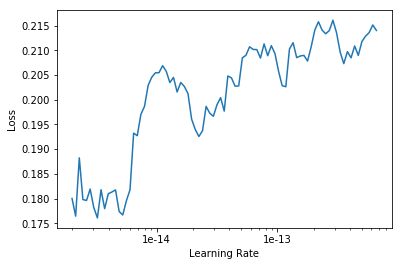

In [52]:
learn.lr_find(start_lr=1e-15, end_lr=1e-12)
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


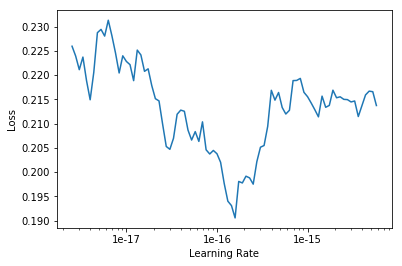

In [53]:
learn.lr_find(start_lr=1e-18, end_lr=1e-14)
learn.recorder.plot()

In [54]:
learn.fit_one_cycle(3, max_lr=slice(1e-17,1e-16))

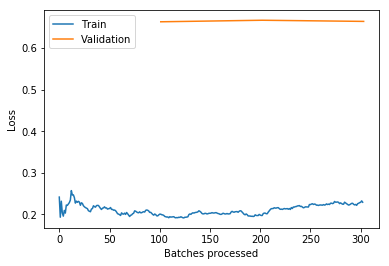

In [55]:
learn.recorder.plot_losses()

In [57]:
learn.freeze()

In [58]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


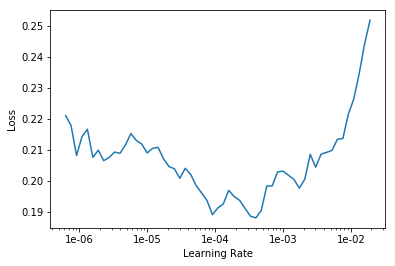

In [59]:
learn.recorder.plot()

In [60]:
learn.fit_one_cycle(5, max_lr=slice(1e-05, 1e-04))

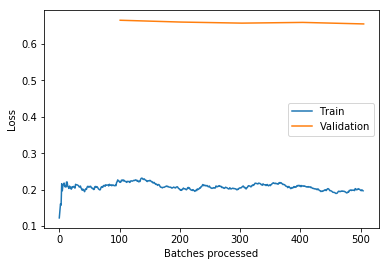

In [61]:
learn.recorder.plot_losses()

In [62]:
learn.save('cars-stage-1-unfreeze-resnet152')

In [173]:
learn = learn.load('cars-stage-1-unfreeze-resnet152')

In [63]:
preds = learn.get_preds(DatasetType.Test)

In [64]:
label_index = np.argmax(preds[0], 1)

In [65]:
test_predictions = [data.classes[int(x)] for x in label_index]

In [66]:
test_df['predictions_unfreeze'] = test_predictions
#test_df['predictions'] = test_predictions

In [67]:
test_df['predictions_unfreeze'] = test_df['predictions_unfreeze'].apply(str)

In [68]:
(test_df['label'] == test_df['predictions_unfreeze']).sum()/test_df.shape[0]

0.8347220494963313

In [69]:
test_df.to_csv('cars-stage-1.csv')